# **SD-TSIA-204 - Statistics: Linear Models (2022/2023)**
## **TP 2: Linear Regression**

**Name:** Ivan Luiz DE MOURA MATOS

In [ ]:
# fn1 = "ivan luiz"
# ln1 = "de moura matos"
# filename = "_".join(map(lambda s: s.strip().lower(),
#                         ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
# print(filename)

Import of necessary packages:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Exercise 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score

# For Exercise 2
import scipy.stats as stat

# For Exercise 3
import sklearn.linear_model as lm

# For Exercise 4
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

# For Exercise 7
from sklearn.linear_model import ElasticNet

# For Exercise 9
import seaborn as sns

In [ ]:
# We also import a library to adapt the style of the plots
# to consider colorblindness
import matplotlib.style as style
style.use('tableau-colorblind10')

## **Exercise 1**

**a)** We first set the random seed to 0:


In [ ]:
np.random.seed(0)

**(b)** Loading the dataset into a dataframe, and printing the first five rows:

In [ ]:
df = pd.read_csv('meatspec.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


We now print the mean and standard deviation of the covariates *X* (i.e., ``V1``,...,``V2``) and of the output variable *Y* (``fat``):

In [ ]:
# ((df.iloc[:,:-1]).describe().transpose())[['mean', 'std']].head(100)
(df.describe().transpose())[['mean', 'std']].head(len(df))

,mean,std
V1,2.808561,0.410793
V2,2.811137,0.413352
V3,2.813727,0.415906
V4,2.816363,0.418465
V5,2.819098,0.421040
...,...,...
V97,3.081070,0.539730
V98,3.062290,0.538586
V99,3.043548,0.537108
V100,3.024895,0.535354


**c)** In order to see if the data is *centered*, we calculate the mean of the covariates *X*, and also of the outuput *Y*. If the mean values are all equal to zero, we conclude that the model is centered; otherwise, it is not. From what we obtained above, we see that the mean values of ``V1``,...,``V2`` and ``fat`` are **not** all equal to zero. Therefore, **the data is *not* centered**.

Moreover, from the results above, we see that the standard deviation values of the covariates and of *Y* are **not** all equal to 1. We conclude, then, that **the data is *not* normalized**.

Finally, from this discussion, it follows that **the data is *not* standardized**.

Creation of a matrix **X** (to store the values of the covariates for each observation) and of a vector **Y** (to store the values of the variable ``fat``).

In [ ]:
X = np.array(df.iloc[:, :-1])               # Design matrix
Y = np.array(df.iloc[:, -1]).reshape(-1,1)  # Vector to store output variable

Separation of the data in *train* and *test* sets, and then standardizing both sets:

In [ ]:
# Separation as train and test sets
# (We will use 1/4 of the data for testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,
                                                    random_state = 0)

# Standardization of the data:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)

**d)** Now, we do the fitting of a regular **OLS**.

First, it is important to notice that it is *not* necessary to fit the intercept, since the data was standardized (which implies that it was *centered*). Hence, the intercept is necessarily zero.

In [ ]:
# Remark: It is not necessary to add a first columns of 1s in the matrix X. If
# we needed to do so, it could be written as: X_train = sm.add_constant(X_train)

# Obtaining the OLS model
model = sm.OLS(Y_train, X_train).fit()

# Vector of OLS parameters (theta_1, ..., theta_100)
theta = model.params

# R2 coefficient of the regression
R_squared_test = r2_score(Y_test, X_test @ theta)   # R2 coeff. usign test set
R_squared_train = model.rsquared                    # R2 coeff. using train set

**e)** We store the $R^2$ coefficient in a DataFrame, for future comparison to other models:

In [ ]:
# Storing the R2 coefficient in a dataframe for future comparison
df_coef = pd.DataFrame()
df_coef.loc['Exercise 1 - Regular OLS','R2 values (test)'] = R_squared_test
df_coef.loc['Exercise 1 - Regular OLS','R2 values (train)'] = R_squared_train

df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789


In [ ]:
# To show information about the model (coefficients, R2 value, etc.),
# uncomment the following line
# print(str(model.summary()))

# **Variable selection**

## **Exercise 2**

We implement the method of ***forward variable selection*** as seen during the course. The algorithm is detailed at page 26 of the lecture notes.

We will use the test statistic for the "test of no effect", as proposed in the lecture notes (pages 25 and 26). At each iteration of the algorithm, we calculate the test statistic for a covariate $\tilde{X}_k$ through the following expression (**with the notation used in the lecture notes**):

$$
T_n(r, \tilde{X}_k) = \sqrt{n} \; \frac{\hat{\theta}_n(r,\tilde{X}_k)}{\hat{s}_n(\tilde{X}_k) \; \hat{\sigma}_n(r,\tilde{X}_k)}
$$

where
- $r$ is the residual (updated at each iteration),
- $\hat{\theta}_n(r,\tilde{X}_k)$ is the OLS coefficient: $\hat{\theta}_n(r,\tilde{X}_k) = \textrm{argmin}_{\theta \in \mathbb{R}} \|r - \theta \, \tilde{X}_k\|^2$ ,
- $\hat{s}_n(\tilde{X}_k) = 1 / \sqrt{ \big(\tilde{X}_k^T \, \tilde{X}_k\big)/n}$ ,
- $\hat{\sigma}_n(r,\tilde{X}_k) = \frac{1}{n-1} \, \| r - \hat{\theta}_n(r,\tilde{X}_k) \, \tilde{X}_k\|^2$, where $n$ is the number of samples in the training set.

Since the data was standardized, it follows that the (empirical) mean and variance of each covariate are equal to 0 and 1, respectively. We have, then,
$\sqrt{ \big(\tilde{X}_k^T \, \tilde{X}_k\big)/n} = \sqrt{\textrm{Var}(\tilde{X}_k)} = 1$, and, therefore, $\hat{s}_n(\tilde{X}_k) = 1$.

The test statistic then is simplified to:
$$
T_n(r, \tilde{X}_k) = \sqrt{n} \; \frac{\hat{\theta}_n(r,\tilde{X}_k)}{\hat{\sigma}_n(r,\tilde{X}_k)}
$$

Since $T_n$ follows a t-distribution with $n-1$ degrees of freedom, the *p-value* associated to each covariate $\tilde{X}_k$ is calculated as
$$
2\cdot\Big[ 1 - Q\big(\,|T_n(r,\tilde{X}_k)|\,\big) \Big]
$$
where $Q(\cdot)$ denotes the quantile function of the t-distribution with $n-1$ degrees of freedom.

In [ ]:
n = X_train.shape[0]               # number of samples in the train set
num_covariates = X_train.shape[1]  # number of covariates (in this case, 100)

# DataFrame to store the indexes of the covariates in the order they were
# selected and their respective p-values
selected_indexes = pd.DataFrame(columns=['index', 'Covariate name', 'p-value'])

# Initialization of the residuals
resid = Y_train

# Function to compute the test statistic for the "test of no effect"
def calc_T(k):

    # Column of the matrix X corresponding to the covariate k
    X_k = X_train[:, k].reshape(-1,1)

    # Obtention of the OLS coefficient theta
    theta = sm.OLS(resid, X_k).fit().params[0]

    # Unbiased estimator for the variance of the prediction error
    sigma_sq = (np.linalg.norm(resid - theta * X_k))**2 / (n-1)

    # Test statistic for the test of no effect
    T = np.sqrt(n) * theta / np.sqrt(sigma_sq)

    return T

# Function to calculate the p-value associated to the test statistic T,
# assuming a t-distribution of n-1 degrees of freedom
def calc_p_val(T):
    p_value_T = 2*(1 - stat.t.cdf(abs(T), n-1))
    return p_value_T

# Forward variable selection algorithm
for i in range(num_covariates):

    # List to store the indexes that were not selected yet
    remaining_indexes = [k for k in range(num_covariates)
                         if k not in selected_indexes['index'].values]

    chosen_index = remaining_indexes[0]
    T = calc_T(chosen_index)
    current_p_val = calc_p_val(T)

    # Finding the covariate with the smallest corresponding p-value,
    # at the current iteration i
    if (len(remaining_indexes) > 1):

        for k in remaining_indexes[1:]:
            T = calc_T(k)           # test stastistic T calculation
            p_val = calc_p_val(T)   # p-value calculation

            if (p_val < current_p_val):
                current_p_val = p_val
                chosen_index = k

    selected_indexes.loc[i, 'index'] = chosen_index
    selected_indexes.loc[i,'Covariate name'] = df.columns[chosen_index]
    selected_indexes.loc[i, 'p-value'] = current_p_val

    # Coefficient associated to the selected covariate (at current iteration)
    theta = sm.OLS(resid, X_train[:,chosen_index]).fit().params[0]

    # Updating the residuals
    resid = resid - X_train[:,chosen_index].reshape(-1,1) * theta

Below, we show the first ten variables in the order obtained from the *forward variable selection* algorithm, as well as their respective p-value:

In [ ]:
selected_indexes.head(10)

,index,Covariate name,p-value
0,40,V41,0.0
1,7,V8,0.051714
2,39,V40,0.054108
3,6,V7,0.054918
4,41,V42,0.059074
5,8,V9,0.060235
6,38,V39,0.064927
7,5,V6,0.066146
8,42,V43,0.078051
9,9,V10,0.079636


We now plot the p-value of each one of the covariates.
One should notice that, in the x-axis, we show the index of each covariate, where 0 corresponds to ``V1``, 1 to ``V2``, etc.

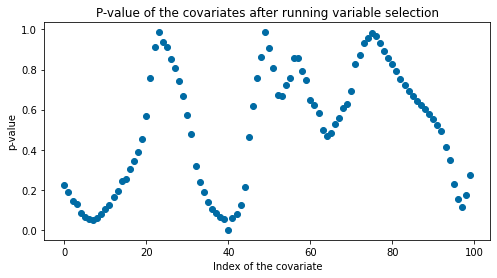

In [ ]:
plt.figure(figsize=(8, 4))

plt.scatter(range(num_covariates),
            (selected_indexes.sort_values('index'))['p-value'].values)

plt.title('P-value of the covariates after running variable selection')
plt.xlabel('Index of the covariate')
plt.ylabel('p-value')

plt.show()

We can verify that ``V41`` is the only covariate with an associated p-value smaller than 0.05:

In [ ]:
selected_indexes[selected_indexes['p-value'] < 0.05]

,index,Covariate name,p-value
0,40,V41,0.0


In [ ]:
print("P-value associated to covariate V41:", selected_indexes.loc[0,'p-value'])

P-value associated to covariate V41: 8.215650382226158e-15


## **Exercise 3**

**a)** It is asked to run OLS on the values with a p-value smaller than 0.05. As seen in the Exercise 2, the only covariate that satisfies this condition is ``V41``. We will use the ``OLS`` of ``sklearn`` to fit a model using this covariate.

In [ ]:
# We want to fit a OLS model without intercept (the data is centered)
skl_model = lm.LinearRegression(fit_intercept=False)

# The covariate V41 is the only one with a p-value < 0.05
covariate_V41 = X_train[:, 40].reshape(-1,1)

# We run OLS on the variable V41
skl_model.fit(covariate_V41, Y_train)

LinearRegression(fit_intercept=False)

In [ ]:
# If we want to plot the OLS line:
# plt.scatter(covariate_V41, Y_train)
# plt.plot(covariate_V41, skl_model.coef_[0]*covariate_V41, color='red')
# plt.show()

**b)** We obtain the following determination coefficient ($R^2$):

In [ ]:
R_squared_test = skl_model.score(X_test[:, 40].reshape(-1,1), Y_test)
print("R2 coefficient (test set):", R_squared_test)

R_squared_train = skl_model.score(covariate_V41, Y_train)
print("R2 coefficient (train set):", R_squared_train)

R2 coefficient (test set): 0.12713946972367185
R2 coefficient (train set): 0.3146976272215324


We store the $R^2$ coefficient in the DataFrame ``df_coef``for comparison:

In [ ]:
df_coef.loc['Exercise 3 - OLS with Variable Selection',
            'R2 values (test)'] = R_squared_test

df_coef.loc['Exercise 3 - OLS with Variable Selection',
            'R2 values (train)'] = R_squared_train
df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789
Exercise 3 - OLS with Variable Selection,0.127139,0.314698


## **Exercise 4**


We now use ``SequentialFeatureSelector`` (with forward selection) to select one covariate. In the sequence, we show the selected variable:

In [ ]:
skl_model = lm.LinearRegression(fit_intercept=False)

selector = SequentialFeatureSelector(skl_model, n_features_to_select=1)

selector.fit(X_train, Y_train)

print("The index of the selected variable is:",
      np.where(selector.get_support())[0][0])

The index of the selected variable is: 40


**a)** We can observe that the index of the selected variable is **40**, which corresponds to the covariate ``V41``, the same selected at Exercise 3.

The ``SequentialFeatureSelector`` selects the same variable as the one selected by the Forward Variable Selection algorithm implemented in Exercise 2.

If we selected more than one variable using each method, we could verify that the two methods may not return the same variables. The reason is related to the fact that the algorithm that we implemented in Exercise 2 uses the p-value of $T$ (the test statistic of no-effect) as the criterion to select the features; on the other hand, the criterion used by ``SequentialFeatureSelector`` is, by default, the R2 coefficient of each OLS line fitted (as can be seen in the documentation of the method).

We now calculate the $R^2$ coefficient. It is the same as the one calculated in the Exercise 3, since we selected, again, only the feature ``V41`` to run the OLS.

In [ ]:
skl_model.fit(covariate_V41, Y_train)

R_squared_train = skl_model.score(covariate_V41,Y_train)
R_squared_test = skl_model.score(X_test[:, 40].reshape(-1,1), Y_test)
print("R2 coefficient (test set):", R_squared_test)
print("R2 coefficient (train set):", R_squared_train)

R2 coefficient (test set): 0.12713946972367185
R2 coefficient (train set): 0.3146976272215324


In the sequence, we store the value of the $R^2$ coefficient in the DataFrame ``df_coef``:

In [ ]:
# Storing the R2 coefficient in the DataFrame for comparison

df_coef.loc['Exercise 4 - OLS with sklearn\'s variable selection',
            'R2 values (test)'] = R_squared_test

df_coef.loc['Exercise 4 - OLS with sklearn\'s variable selection',
            'R2 values (train)'] = R_squared_train
df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789
Exercise 3 - OLS with Variable Selection,0.127139,0.314698
Exercise 4 - OLS with sklearn's variable selection,0.127139,0.314698


# **Ridge**

## **Exercise 5**

In this exercise, we implement the *ridge estimator*.

Let $p$ denote the number of covariates. We consider that the data is standardized (and, therefore, *centered*).

The ridge estimator $\hat{\theta}^{(rdg)}$ is the solution of:

$$
\textrm{argmin}_{\theta \in \mathbb{R}^p} \Big( \|Y - X\,\theta \|^2 + n\alpha\| \theta\|^2 \Big)
$$
with $\alpha > 0$.

The solution is *unique* and, as seen in class (page 30 of the lecture notes), it is given by

$$
\hat{\theta}^{(rdg)} = (X^T X + n\,\alpha\,I_p)^{-1} X^T Y
$$

In the following, we code a function that returns the vector of coefficients $\hat{\theta}^{(rdg)}$, given the penalty parameter $\alpha > 0$ and the matrices $X$ and $Y$.


In [ ]:
def ridge_coefs(X, Y, alpha):

    n = X.shape[0]    # number of samples
    p = X.shape[1]    # number of covariates

    # Vector composed of the coefficients of the ridge estimator
    theta = np.linalg.inv((X.T @ X) + n*alpha*np.identity(p)) @ X.T @ Y
    theta = (theta.T)[0]    # Conversion from "column array" to "row array"

    return theta

In [ ]:
# We could compare with the results obtained using the ridge implementation
# of sklearn. One should notice, however, that the regularization term considered
# in the sklearn's implementation is: alpha * (squared norm of theta)
# instead of: n * alpha * (squared norm of theta).

# For example, with alpha = 0.5:
# model_ridge = lm.Ridge(alpha=0.5*X_train.shape[0], fit_intercept = False)
# model_ridge.fit(X_train,Y_train)
# model_ridge.coef_.T

**a)** We plot how the values of the coefficients change accordingly to the parameter $\alpha$:

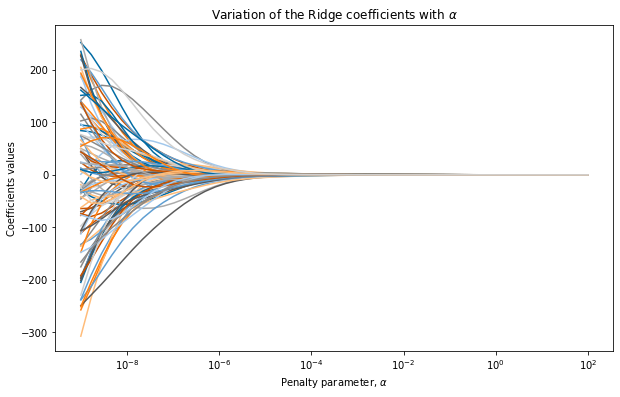

In [ ]:
# We will use a penalty parameter alpha evenly spaced on a log scale
# from 10^(-9) to 10^(2).
alpha_values = np.logspace(-9, 2)

# We will store the values of the coefficients as a function of alpha
# in a dictionary. The keys will be the covariates' indexes and each
# key k will correspond to a list of the values of the covariate k

coefs_dict = {}
for k in range(X_train.shape[1]):
    coefs_dict[k] = []

# Storing the values of each covariate for each alpha

for alpha in alpha_values:
    coefs = ridge_coefs(X_train, Y_train, alpha)
    for k in range(X_train.shape[1]):
        coefs_dict[k].append(coefs[k])

# Plotting the "ridge path"

plt.figure(figsize=(10, 6))

for k in range(X_train.shape[1]):
    # Plot of the curve associated to the covariate of index k
    plt.plot(alpha_values, coefs_dict[k])

plt.xscale('log')
plt.title(r'Variation of the Ridge coefficients with $\alpha$')
plt.xlabel(r'Penalty parameter, $\alpha$')
plt.ylabel(r'Coefficients values')

plt.show()

**b)** Now, we plot how the mean squared error (MSE) of both the train and test sets change with $\alpha$. We indicate the minimum with a point.

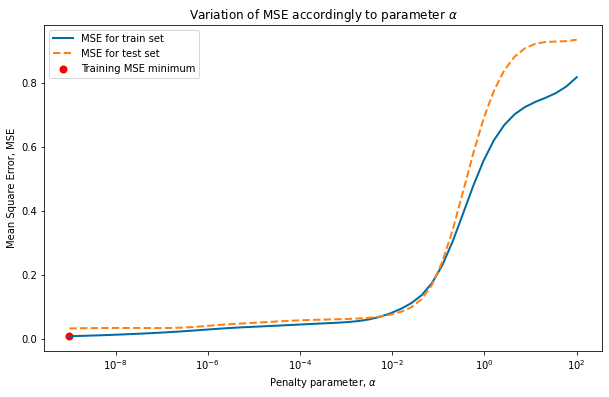

In [ ]:
alpha_values = np.logspace(-9, 2)

MSE_train = []
MSE_test = []

for alpha in alpha_values:
    coefs = ridge_coefs(X_train, Y_train, alpha)    # Ridge coefficients

    # Calculation of the residuals associated to the train and test sets
    resid_train = Y_train - X_train @ (coefs.reshape(-1, 1))
    resid_test = Y_test - X_test @ (coefs.reshape(-1, 1))

    MSE_train.append((np.linalg.norm(resid_train))**2 / X_train.shape[0])
    MSE_test.append((np.linalg.norm(resid_test))**2 / X_test.shape[0])

# Obtention of the index of the training MSE minimizer
minimizer_index = np.argmin(MSE_train)

# Plotting the MSE curves and the minimum of the training MSE

plt.figure(figsize=(10, 6))

plt.plot(alpha_values, MSE_train, label='MSE for train set', linewidth=2)
plt.plot(alpha_values, MSE_test, label='MSE for test set', linewidth=2,
         linestyle='dashed')

plt.scatter(alpha_values[minimizer_index], MSE_train[minimizer_index],
            color = 'red', linewidth = 2, label = 'Training MSE minimum')

plt.xscale('log')
plt.title(r'Variation of MSE accordingly to parameter $\alpha$')
plt.xlabel(r'Penalty parameter, $\alpha$')
plt.ylabel(r'Mean Square Error, MSE')
plt.legend()

plt.show()

In [ ]:
#Remark:
# If we wanted to use the Lasso implementation from sklearn for comparison,
# we could run the following code:

# from sklearn.metrics import mean_squared_error

# MSE_train = []
# MSE_test = []

# for a in alpha_values:
#     model_ridge = lm.Ridge(alpha=a*X_train.shape[0], fit_intercept = False)
#     model_ridge.fit(X_train,Y_train)

#     resid_train = Y_train - model_ridge.predict(X_train)
#     resid_test = Y_test - model_ridge.predict(X_test)

#     #MSE_train.append((np.linalg.norm(resid_train))**2 / X_train.shape[0])
#     #MSE_test.append((np.linalg.norm(resid_test))**2 / X_test.shape[0])

#     MSE_train.append(mean_squared_error(Y_train, model_ridge.predict(X_train)))
#     MSE_test.append(mean_squared_error(Y_test, model_ridge.predict(X_test)))

# plt.plot(alpha_values, MSE_train)
# plt.plot(alpha_values, MSE_test)

# plt.xscale('log')

# plt.show()

**c)** Now, we show and store the R2 coefficient for the best performing value of $\alpha$ (that is, the one with smallest training error).

In [ ]:
coefs = ridge_coefs(X_train, Y_train, alpha_values[minimizer_index])

R_squared_test = r2_score(Y_test, X_test @ coefs)
R_squared_train = r2_score(Y_train, X_train @ coefs)

print("R2 coefficient (with test set) for the best performing value of alpha: ",
      R_squared_test)
print("R2 coefficient (with train set) for the best performing value of alpha: ",
      R_squared_train)

R2 coefficient (with test set) for the best performing value of alpha:  0.968268818363987
R2 coefficient (with train set) for the best performing value of alpha:  0.9922392664103784


In [ ]:
# Storing the R2 coefficient in the DataFrame for comparison
df_coef.loc['Exercise 5 - Ridge ','R2 values (test)'] = R_squared_test
df_coef.loc['Exercise 5 - Ridge ','R2 values (train)'] = R_squared_train

df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789
Exercise 3 - OLS with Variable Selection,0.127139,0.314698
Exercise 4 - OLS with sklearn's variable selection,0.127139,0.314698
Exercise 5 - Ridge,0.968269,0.992239


# **Crossvalidation, Lasso and elastic net**

## **Exercise 6**

In this exercise, we will use a penalty parameter $\alpha$ evenly spaced on a log scale from $10^{-5}$ to $10^{-2}$.

In [ ]:
alpha_values = np.logspace(-5, -2)

When we execute the next cell (which is commented), we see some warning messages, regarding the non-convergence of the Lasso algorithm:
"``
ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.
``"

In [ ]:
# for alpha in alpha_values:
#     model_lasso = lm.Lasso(alpha, fit_intercept = False)
#     model_lasso.fit(X_train, Y_train)

**a)** The warning messages arise due to the fact that the Lasso algorithm was not able to converge, using the default values for tolerance (``tol``) and maximum number of iterations (``max_iter``). The Lasso method is based on an iterative process: for example, at each iteration, the value of the coefficients of the model are updated, and, as the number of iterations increase, those values tend to converge.

To stop the iterations, the algorithm tests if the difference between the value of the dual gap for optimality of two consecutive iterations is smaller than ``tol``. If the maximum number of iterations that we chose is not sufficient to make the difference smaller than the tolerance, then the algorithm provides the non-convergence warning messages.

In order to avoid the warning messages, we will try to increase the maximum number of iterations and the tolerance (``max_iter`` and ``tol`` parameters, respectively). The default value of ``max_iter`` is 1000; The default value of ``tol`` is 0.0001. Let us increase ``max_iter`` to 5 million ($5\times10^6$) and ``tol`` to 0.05.

In [ ]:
number_non_zero_coeffs = []

lasso_coeffs = []   # List to store the Lasso coefficients for each alpha
                    # (It will be useful in question 6-d)

MSE_train = []  # List to store the MSE (with train set) for each alpha
MSE_test = []   # List to store the MSE (with test set) for each alpha

for alpha in alpha_values:
    model_lasso = lm.Lasso(alpha, fit_intercept = False,
                           max_iter = 5_000_000, tol = 0.05)

    model_lasso.fit(X_train, Y_train)

    number_non_zero_coeffs.append(sum(np.abs(model_lasso.coef_) > 1e-6))

    coefs = model_lasso.coef_

    lasso_coeffs.append(coefs)

    resid_train = Y_train - X_train @ (coefs.reshape(-1, 1))
    resid_test = Y_test - X_test @ (coefs.reshape(-1, 1))

    MSE_train.append((np.linalg.norm(resid_train))**2 / X_train.shape[0])
    MSE_test.append((np.linalg.norm(resid_test))**2 / X_test.shape[0])

**b)** In the following, we plot the number of non-null coefficients for each value of $\alpha$:

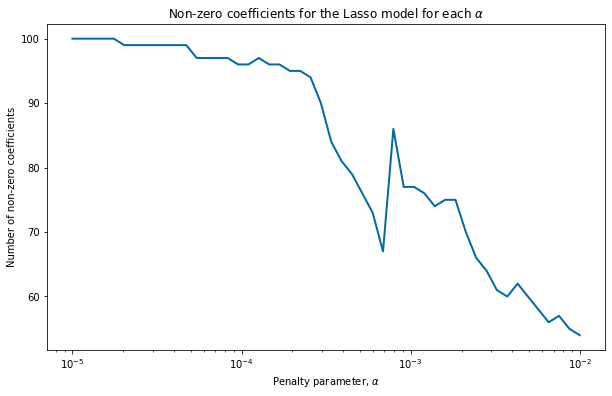

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(alpha_values, number_non_zero_coeffs, linewidth=2)

plt.xscale('log')
plt.title(r'Non-zero coefficients for the Lasso model for each $\alpha$')
plt.xlabel(r'Penalty parameter, $\alpha$')
plt.ylabel(r'Number of non-zero coefficients')

plt.show()

**c)** Now, we plot how the mean squared error (MSE) of both the train and test sets change with $\alpha$. We indicate the minimum of the training MSE with a point.

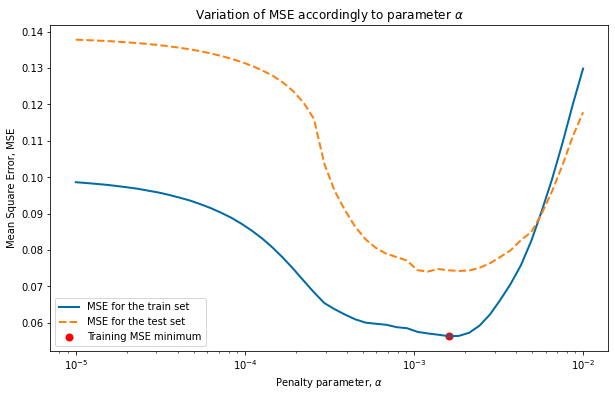

In [ ]:
# Obtention of the index of the training MSE minimizer
minimizer_index = np.argmin(MSE_train)

#Plotting the MSE curves

plt.figure(figsize=(10, 6))

plt.plot(alpha_values, MSE_train, label='MSE for the train set', linewidth=2)
plt.plot(alpha_values, MSE_test, label='MSE for the test set', linewidth=2,
         linestyle='dashed')

plt.scatter(alpha_values[minimizer_index], MSE_train[minimizer_index],
            color = 'red', linewidth = 2, label = 'Training MSE minimum')

plt.xscale('log')
plt.title(r'Variation of MSE accordingly to parameter $\alpha$')
plt.xlabel(r'Penalty parameter, $\alpha$')
plt.ylabel(r'Mean Square Error, MSE')
plt.legend()

plt.show()

**d)** Now, we show and store the R2 coefficient for the best performing value of $\alpha$ :

In [ ]:
# # Training the Lasso model with the best performing alpha
# model_lasso = lm.Lasso(alpha_values[minimizer_index],
#                        fit_intercept = False,
#                        max_iter = 5_000_000, tol = 0.005)
# model_lasso.fit(X_train, Y_train)

coefs_best_alpha = lasso_coeffs[minimizer_index]

R_squared_test = r2_score(Y_test, X_test @ coefs_best_alpha)
R_squared_train = r2_score(Y_train, X_train @ coefs_best_alpha)

print("R2 score (with test set) for the best performing value of alpha: ",
      R_squared_test)
print("R2 score (with train set) for the best performing value of alpha: ",
      R_squared_train)

R2 score (with test set) for the best performing value of alpha:  0.9258823053406563
R2 score (with train set) for the best performing value of alpha:  0.9436707887723057


In [ ]:
# Storing the R2 coefficient in the DataFrame for comparison
df_coef.loc['Exercise 6 - Lasso ','R2 values (test)'] = R_squared_test
df_coef.loc['Exercise 6 - Lasso ','R2 values (train)'] = R_squared_train
df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789
Exercise 3 - OLS with Variable Selection,0.127139,0.314698
Exercise 4 - OLS with sklearn's variable selection,0.127139,0.314698
Exercise 5 - Ridge,0.968269,0.992239
Exercise 6 - Lasso,0.925882,0.943671


## **Exercise 7**

Now, we code our **_crossvalidation_** algorithm. One should notice that the length of two different folds differ at most by one. We use the ``sklearn`` implementation of Elastic Net. As penalty parameters, we consider an $\alpha$-ridge evenly spaced on a log scale from $10^{-10}$ to $10^{3}$, and an $\alpha$-lasso in [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99].

Firstly, we write the code to create the $K$ folds. We will use $K = 10$:

In [ ]:
K = 10   # Number of folds

size_fold = n // K
remainder = n % K

folds_indexes = [0 for k in range(K)]

begin_index = 0

# Distributing the samples in each fold, respecting the restriction that
# the length of two different folds differ at most by one
for k in range(K):
    if (k+1 <= remainder):
        folds_indexes[k] = list(range(begin_index, begin_index + size_fold + 1))
        begin_index += size_fold + 1
    else:
        folds_indexes[k] = list(range(begin_index, begin_index + size_fold))
        begin_index += size_fold

    # print(folds_indexes[k],"   ", len(folds_indexes[k]))

Now, we code the crossvalidation and test it with an Elastic Net model:

In [ ]:
alpha_ridge_values = np.logspace(-10, 3)
alpha_lasso_values = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]

# Creation of a dictionary to store the MSE associated to each pair
# of regularization parameter (alpha_ridge, alpha_lasso)
errors_CV = {}
for alpha_lasso in alpha_lasso_values:
    for alpha_ridge in alpha_ridge_values:
        errors_CV[(alpha_ridge, alpha_lasso)] = 0

for k in range(K):
    for alpha_lasso in alpha_lasso_values:
        for alpha_ridge in alpha_ridge_values:

            model_elastic_net = ElasticNet(alpha = alpha_lasso + 2*alpha_ridge,
                                        l1_ratio = alpha_lasso/(alpha_lasso + 2*alpha_ridge),
                                        fit_intercept = False,
                                        max_iter = 1_000_000,
                                        tol = 0.5,
                                        random_state=0)

            # Fitting the Elastic Net model with the pair of regularization
            # parameters (alpha_ridge, alpha_lasso)
            model_elastic_net.fit(X_train[folds_indexes[k], :],
                                  Y_train[folds_indexes[k]])

            # List to store the indexes of the samples in the validation set
            # (i.e. the indexes that are not in the current fold)
            validation_indexes = [i for i in range(X_train.shape[0])
                                  if i not in folds_indexes[k]]

            # Predicted output
            Y_pred = model_elastic_net.predict(X_train[validation_indexes, :])

            # Calculating the MSE (for the current fold and for each pair of
            # regularization parameters) and storing it
            # (Note: to store the MSE, we divide it by K because)
            MSE = mean_squared_error(Y_train[validation_indexes], Y_pred)

            errors_CV[(alpha_ridge, alpha_lasso)] += MSE / K

            # print((alpha_ridge,alpha_lasso), ":", MSE / K)

Finally, we plot the results of the crossvalidation tested with the regularization parameters proposed:

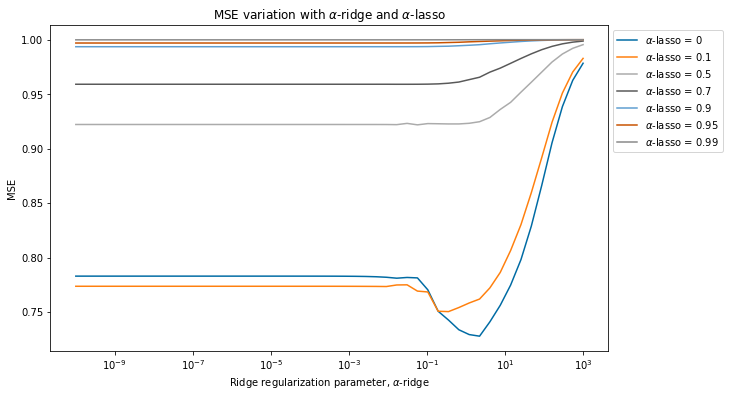

In [ ]:
plt.figure(figsize=(10,6))

for alpha_lasso in alpha_lasso_values:
    MSE_curve = []
    for alpha_ridge in alpha_ridge_values:
        MSE_curve.append(errors_CV[alpha_ridge, alpha_lasso])
    plt.plot(alpha_ridge_values, MSE_curve,
             label=r'$\alpha$-lasso = '+str(alpha_lasso))

plt.xscale('log')

plt.title(r'MSE variation with $\alpha$-ridge and $\alpha$-lasso')
plt.xlabel(r'Ridge regularization parameter, $\alpha$-ridge')
plt.ylabel('MSE')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

# **Bootstrap**

## **Exercise 8**

We will consider only the variable of index 40 of the original *non-centered* dataset (this variable corresponds to the column ``V41``). We fit an OLS model with intercept, and then we plot the data points and the regression line that was fitted:

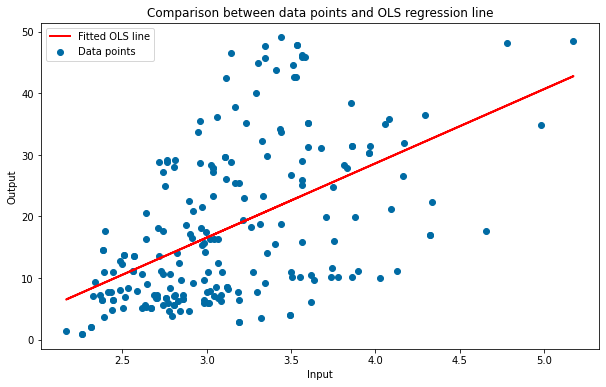

In [ ]:
# Variable of index 40 (V41) of the original dataset (non-centered)
V41_nc = X[:, 40]

# Obtaining the OLS model (considering an intercept)
model = sm.OLS(Y, sm.add_constant(V41_nc)).fit()

# Vector of coefficients (theta_0, theta_1) of the OLS fitted with V41
theta = model.params

# Plotting the dataset and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(V41_nc, Y, label = 'Data points')
plt.plot(V41_nc, sm.add_constant(V41_nc) @ theta, label = 'Fitted OLS line',
         color='red', linewidth = 2)

plt.title('Comparison between data points and OLS regression line')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()
plt.show()

In [ ]:
# For the creation of the prediction interval

# We consider a confidence level given by an alpha equal to 0.05
alpha_pred_interv = 0.05

Y_pred = (sm.add_constant(V41_nc) @ theta).reshape(-1,1)

sigma_sq = ( 1/(V41_nc.shape[0] - 2) ) * np.sum((Y - Y_pred)**2)

diff_squared = (V41_nc - np.mean(V41_nc))**2

aux_term = np.sqrt(1 + 1/V41_nc.shape[0] + diff_squared / np.sum(diff_squared))
aux_term = aux_term.reshape(-1,1)

PI_inf = Y_pred + stat.t.ppf(1-alpha_pred_interv/2, df=V41_nc.shape[0]-2) * np.sqrt(sigma_sq) * aux_term

PI_sup = Y_pred - stat.t.ppf(1-alpha_pred_interv/2, df=V41_nc.shape[0]-2) * np.sqrt(sigma_sq) * aux_term

Implementation of the **bootstrap** algorithm:

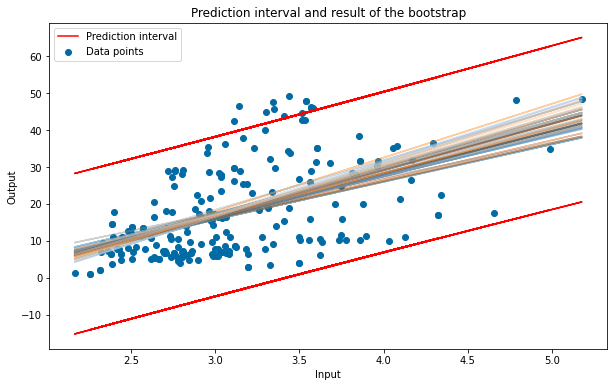

In [ ]:
# Number of bootstrap samples
B = 50

theta_values_bootstrap = []

plt.figure(figsize=(10, 6))

for i in range(B):

    indexes = np.random.randint(0, V41_nc.shape[0], V41_nc.shape[0])

    # Obtaining the OLS model
    model_bootstrap = sm.OLS(Y[indexes], sm.add_constant(V41_nc[indexes])).fit()

    # Vector of parameters (theta_0, theta_1)
    theta = model_bootstrap.params

    plt.plot(V41_nc, sm.add_constant(V41_nc) @ theta, alpha = 0.4)


plt.plot(V41_nc, PI_inf, color ='red', label='Prediction interval')
plt.plot(V41_nc, PI_sup, color = 'red')
plt.scatter(V41_nc, Y, label = 'Data points')

plt.title('Prediction interval and result of the bootstrap')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()

plt.show()

# **PCA**

## **Exercise 9**

Firstly, we compute the singular value decomposition of the covariance matrix:

In [ ]:
n = X_train.shape[0]    # number of samples in the train set

covariance_matrix = (X_train.T @ X_train) / (X_train.shape[0])

U, s, V = np.linalg.svd(covariance_matrix)

**a)** We plot the heatmap of the covariance matrix:

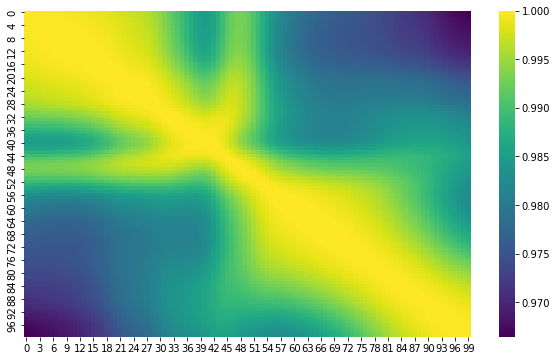

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(covariance_matrix, cmap='viridis')
plt.show()

**b)** and **c)**

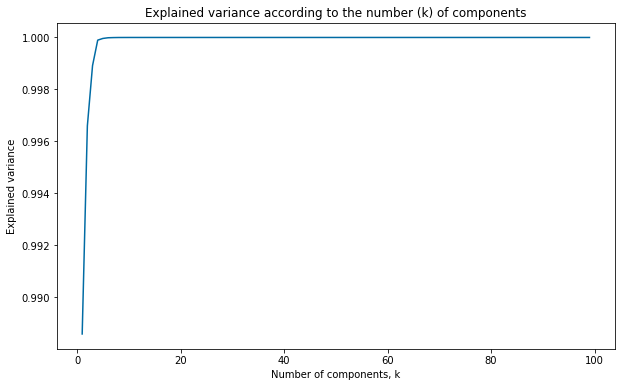

In [ ]:
p = X_train.shape[1] # Number of covariates

# Calculation of the explained variances

principal_components = X_train @ U

# Each position k of the list stores the explained variances
# for the first k components, with k = 2, 3, ..., p
explained_variances = []

sum_singular_values = np.sum(s)

plt.figure(figsize=(10, 6))

for i in range(1, p):
    # Calculating and storing the explained variances
    explained_variances.append( np.sum(s[:i]) / sum_singular_values )

plt.plot(list(range(1,p)),explained_variances)

plt.title('Explained variance according to the number (k) of components')
plt.xlabel('Number of components, k')
plt.ylabel('Explained variance')

plt.show()

**d)** We plot the projected data on the first 2 PCs, using as color the value of $y$ (from the train set).

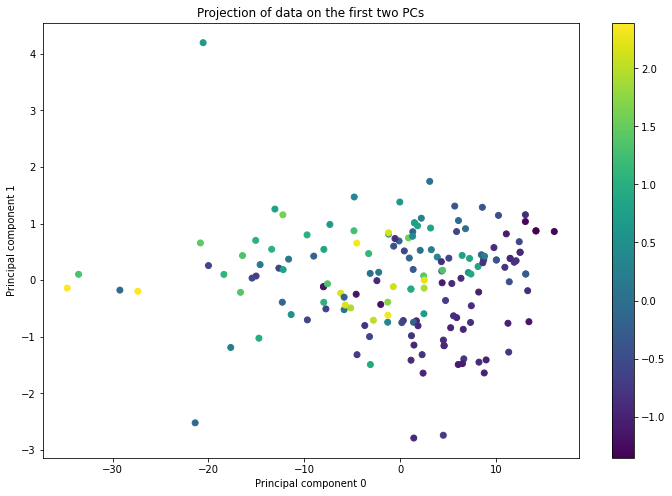

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(principal_components[:, 0].reshape(-1,1),
            principal_components[:, 1].reshape(-1,1),
            c = Y_train.reshape(-1))

plt.colorbar()

plt.title('Projection of data on the first two PCs')

plt.xlabel('Principal component 0')
plt.ylabel('Principal component 1')

plt.show()

**e)** Now, we run OLS on the projected data using $k$ components. In the sequence, we store the best R2 score in the dataFrame for comparison.

In [ ]:
r2_list_test = []
r2_list_train = []


for k in range(1, p):

    proj = (X_train @ U)[:,:k]

    # Obtaining the OLS model
    model = sm.OLS(Y_train, proj).fit()

    theta = model.params

    # R2 coefficient of the regression
    R_squared_test = r2_score(Y_test, ((X_test @ U)[:,:k]) @ theta)
    R_squared_train = r2_score(Y_train, ((X_train @ U)[:,:k]) @ theta)

    r2_list_test.append(R_squared_test)
    r2_list_train.append(R_squared_train)

We plot the R2 score according to the number $k$ of components:

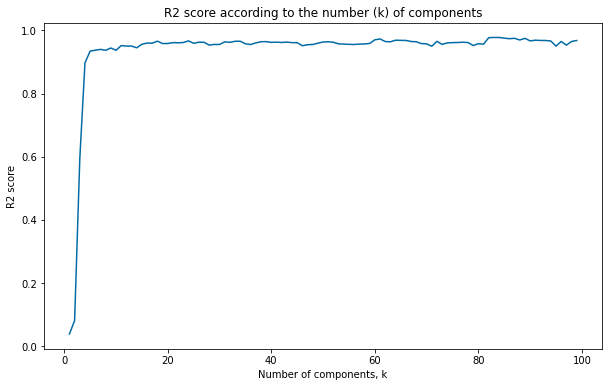

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(list(range(1,p)), r2_list_test)

plt.title('R2 score according to the number (k) of components')
plt.xlabel('Number of components, k')
plt.ylabel('R2 score')

plt.show()

Now we select the best R2 score (based on the test data), and store it in the dataframe. We also store the R2 score based on the train data, corresponding to the value of $k$ that provided the best R2 score (for test).

In [ ]:
k_best = np.argmax(r2_list_test)

# Storing the R2 coefficient in the DataFrame for comparison
df_coef.loc['Exercise 9 - PCA','R2 values (test)'] = r2_list_test[k_best]
df_coef.loc['Exercise 9 - PCA','R2 values (train)'] = r2_list_train[k_best]
df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789
Exercise 3 - OLS with Variable Selection,0.127139,0.314698
Exercise 4 - OLS with sklearn's variable selection,0.127139,0.314698
Exercise 5 - Ridge,0.968269,0.992239
Exercise 6 - Lasso,0.925882,0.943671
Exercise 9 - PCA,0.977460,0.994147


# **Comparison of the models**

## **Exercise 10**

For comparison, we show the dataframe containing the values of the R2 coefficients that we obtained:

In [ ]:
df_coef

,R2 values (test),R2 values (train)
Exercise 1 - Regular OLS,0.960055,0.995789
Exercise 3 - OLS with Variable Selection,0.127139,0.314698
Exercise 4 - OLS with sklearn's variable selection,0.127139,0.314698
Exercise 5 - Ridge,0.968269,0.992239
Exercise 6 - Lasso,0.925882,0.943671
Exercise 9 - PCA,0.977460,0.994147


We will analyse the values of the R2 coefficient that were obtained using the test set.

We can notice that the model that provided the best value of the determination coefficient was the PCA model.

The Lasso model did not provide the best R2 value. This is due to the fact that we had to choose a tolerance large enough, in order to have a convergence in a raisonnable time.

We can notice that the worst value of R2 was obtained using the models from the Exercises 3 and 4 (models obtained after running variable selection on the features). This is due to the fact, for those two models, only one covariate (``V41``) was considered to fit the regression.

On the other hand, the Ridge model provided a better R2 value than the one from the Exercise 1. This is due to the influence of the regularization.

